# Twitter Sentiment Analysis Model Training
A simple study-focused implementation for training sentiment analysis on Twitter data

In [2]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 2. Load and Explore the Dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\Twitter_Data.csv")
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())

Dataset shape: (27481, 4)

Column names: ['textID', 'text', 'selected_text', 'sentiment']

First few rows:
       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative  

Missing values:
textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

Sentiment distribution:
sentiment
neutral     11118
positive     8582
n

In [12]:
print("Available columns:", df.columns.tolist())

# Check for column existence
required_columns = ['cleaned_text', 'sentiment']
missing_cols = [col for col in required_columns if col not in df.columns]

if missing_cols:
    print(f"Missing columns: {missing_cols}")
else:
    # Proceed if columns exist
    df = df.dropna(subset=required_columns)
    text_column = 'cleaned_text'
    X = df[text_column]
    y = df['sentiment']
    print(f"Using '{text_column}' as text features")
    print(f"Final dataset shape: {len(X)} samples")
    print(f"Unique sentiments: {y.unique()}")

Available columns: ['textID', 'text', 'selected_text', 'sentiment']
Missing columns: ['cleaned_text']


In [14]:
# 3. Data Preprocessing
df = df.dropna(subset=['text', 'sentiment'])
text_column = 'text' if 'cleaned_text' in df.columns else 'text'
X = df[text_column]
y = df['sentiment']
print(f"Using '{text_column}' as text features")
print(f"Final dataset shape: {len(X)} samples")
print(f"Unique sentiments: {y.unique()}")

Using 'text' as text features
Final dataset shape: 27480 samples
Unique sentiments: ['neutral' 'negative' 'positive']


In [35]:
import re

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [37]:
df['cleaned_text'] = df['text'].apply(clean_text)


In [39]:
# 3. Data Preprocessing
df = df.dropna(subset=['cleaned_text', 'sentiment'])
text_column = 'cleaned_text' if 'cleaned_text' in df.columns else 'text'
X = df[text_column]
y = df['sentiment']
print(f"Using '{text_column}' as text features")
print(f"Final dataset shape: {len(X)} samples")
print(f"Unique sentiments: {y.unique()}")

Using 'cleaned_text' as text features
Final dataset shape: 27480 samples
Unique sentiments: ['neutral' 'negative' 'positive']


In [41]:
# 4. Text Vectorization
vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.95
)
X_vectorized = vectorizer.fit_transform(X)
print(f"Vectorized features shape: {X_vectorized.shape}")
print(f"Number of features: {len(vectorizer.get_feature_names_out())}")

Vectorized features shape: (27480, 5000)
Number of features: 5000


In [43]:
# 5. Split Data and Train Model
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42, stratify=y
)
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)
print("Model training completed!")

Model training completed!


Accuracy: 0.6827

Classification Report:
              precision    recall  f1-score   support

    negative       0.72      0.59      0.65      1556
     neutral       0.61      0.75      0.67      2223
    positive       0.78      0.68      0.73      1717

    accuracy                           0.68      5496
   macro avg       0.70      0.67      0.68      5496
weighted avg       0.69      0.68      0.68      5496



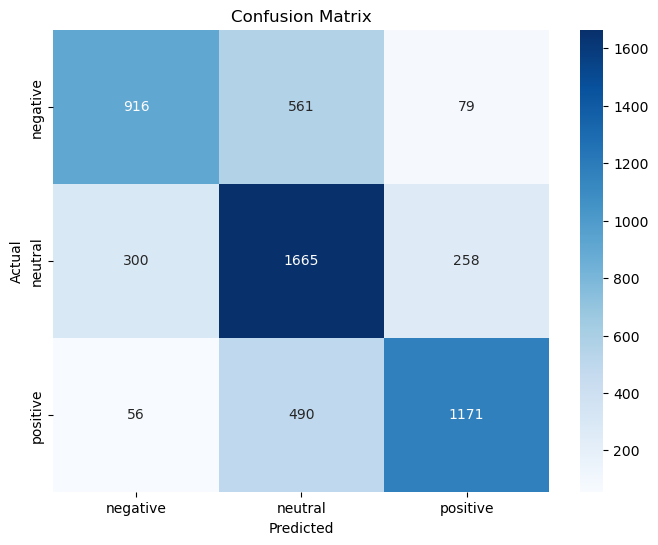

In [45]:
# 6. Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:
# 7. Test the Model with Sample Predictions
def predict_sentiment(text):
    text_vectorized = vectorizer.transform([text])
    prediction = model.predict(text_vectorized)[0]
    probability = model.predict_proba(text_vectorized)[0]
    print(f"Text: '{text}'")
    print(f"Predicted Sentiment: {prediction}")
    print(f"Confidence: {max(probability):.4f}")
    print("-" * 50)

sample_texts = [
    "I love this product! It's amazing!",
    "This is terrible, I hate it",
    "The weather is okay today",
    "Best day ever! So happy!",
    "Not sure about this decision"
]

for text in sample_texts:
    predict_sentiment(text)

Text: 'I love this product! It's amazing!'
Predicted Sentiment: positive
Confidence: 0.9898
--------------------------------------------------
Text: 'This is terrible, I hate it'
Predicted Sentiment: negative
Confidence: 0.9909
--------------------------------------------------
Text: 'The weather is okay today'
Predicted Sentiment: neutral
Confidence: 0.5577
--------------------------------------------------
Text: 'Best day ever! So happy!'
Predicted Sentiment: positive
Confidence: 0.8687
--------------------------------------------------
Text: 'Not sure about this decision'
Predicted Sentiment: neutral
Confidence: 0.3876
--------------------------------------------------


In [49]:
# 8. Feature Importance
feature_names = vectorizer.get_feature_names_out()
for i, class_name in enumerate(model.classes_):
    coef = model.coef_[i] if len(model.classes_) > 2 else (
        model.coef_[0] if i == 1 else -model.coef_[0]
    )
    top_positive = np.argsort(coef)[-10:]
    print(f"\nTop words for '{class_name}':")
    for idx in reversed(top_positive):
        print(f"  {feature_names[idx]}: {coef[idx]:.4f}")


Top words for 'negative':
  sad: 4.7728
  sorry: 4.4677
  sucks: 4.2124
  hate: 4.2078
  miss: 4.1539
  sick: 3.3629
  stupid: 3.3384
  tired: 3.2273
  bored: 3.0964
  fail: 3.0465

Top words for 'neutral':
  hows: 1.7497
  training: 1.2271
  starwarsday: 1.1154
  better soon: 1.1027
  guitar: 1.0651
  werent: 1.0538
  moro: 1.0276
  wolverine: 1.0253
  noticed: 1.0106
  sent: 0.9845

Top words for 'positive':
  love: 6.0270
  awesome: 4.8555
  thanks: 4.7752
  great: 4.3433
  happy: 4.2982
  thank: 4.2825
  nice: 4.1823
  good: 4.1373
  amazing: 3.9575
  enjoy: 3.6278


In [51]:
# 9. Save the Model
import pickle
with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
print("Model and vectorizer saved successfully!")
print("\nTo load the model later:")
print("with open('sentiment_model.pkl', 'rb') as f:")
print("    model = pickle.load(f)")
print("with open('vectorizer.pkl', 'rb') as f:")
print("    vectorizer = pickle.load(f)")

Model and vectorizer saved successfully!

To load the model later:
with open('sentiment_model.pkl', 'rb') as f:
    model = pickle.load(f)
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)


In [54]:
df.head()

,textID,text,selected_text,sentiment,cleaned_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,id have responded if i were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad i will miss you here in san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons of why couldnt they put them on the relea...
